In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import import_ipynb
import sys

%matplotlib inline
%matplotlib notebook

In [3]:
path_in = 'C:\\Users\\mathe\\OneDrive\\Área de Trabalho\\Monte Carlo\\23102023\\Apresentação\\'

In [5]:
# Carga da partícula. +1 para próton, e -1 para elétron
q =  1.0
qe = 1.60217662e-19 # carga elementar.

# Massa da partícula em função da massa do elétron
m = 1.836e3
me= 9.10938356e-31 # massa do elétron em kg.

# rest mass energy in eV
# magnetic permeability of vacuum.
muo=4*np.pi*1e-7

# Razão dos calores específicos ratio of specific heats
gamma= 2

# upstream parameters in physical units as in Marchand et al., Commun. Comput. Phys. (2007), DOI: 10.4208/cicp.201009.280110a
n1  = 1e6                                                # particle number density in #/m^3
T1  = 15.65                                              # ion temperature in eV. Electron temperature assumed to be the same.
B1  = 4.01e-9                                            # magnetic field strength in Tesla.
B1u = np.array([0,0,B1])
v1  = 4.95e5                                             # drifting speed in m/s

# derived parameters
Eu = -np.cross(np.array([0,v1,0]),B1u)                   # electric field. The same on both sides.
p1 = 2*n1*1.3806e-23*(T1*1.1604e4)                       # thermal pressure in Pa (the "2" comes from p = pi + pe = n1*k_B*(Ti+Te)=2*n1*k_B*T1).
rho1 = n1*(m*me)                                         # particle mass density in kg/m^3.
R1 = np.sqrt(p1/rho1)*(m*me)/((np.abs(q)*1.602e-19)*B1)  # thermal gyroradius in m.


print(R1)

142555.4783954147


In [4]:
rx = np.loadtxt(path_in+'boris2D\\Extensao_100\\'+'rx.txt'); ry = np.loadtxt(path_in+'boris2D\\Extensao_100\\'+'ry.txt')

<IPython.core.display.Javascript object>


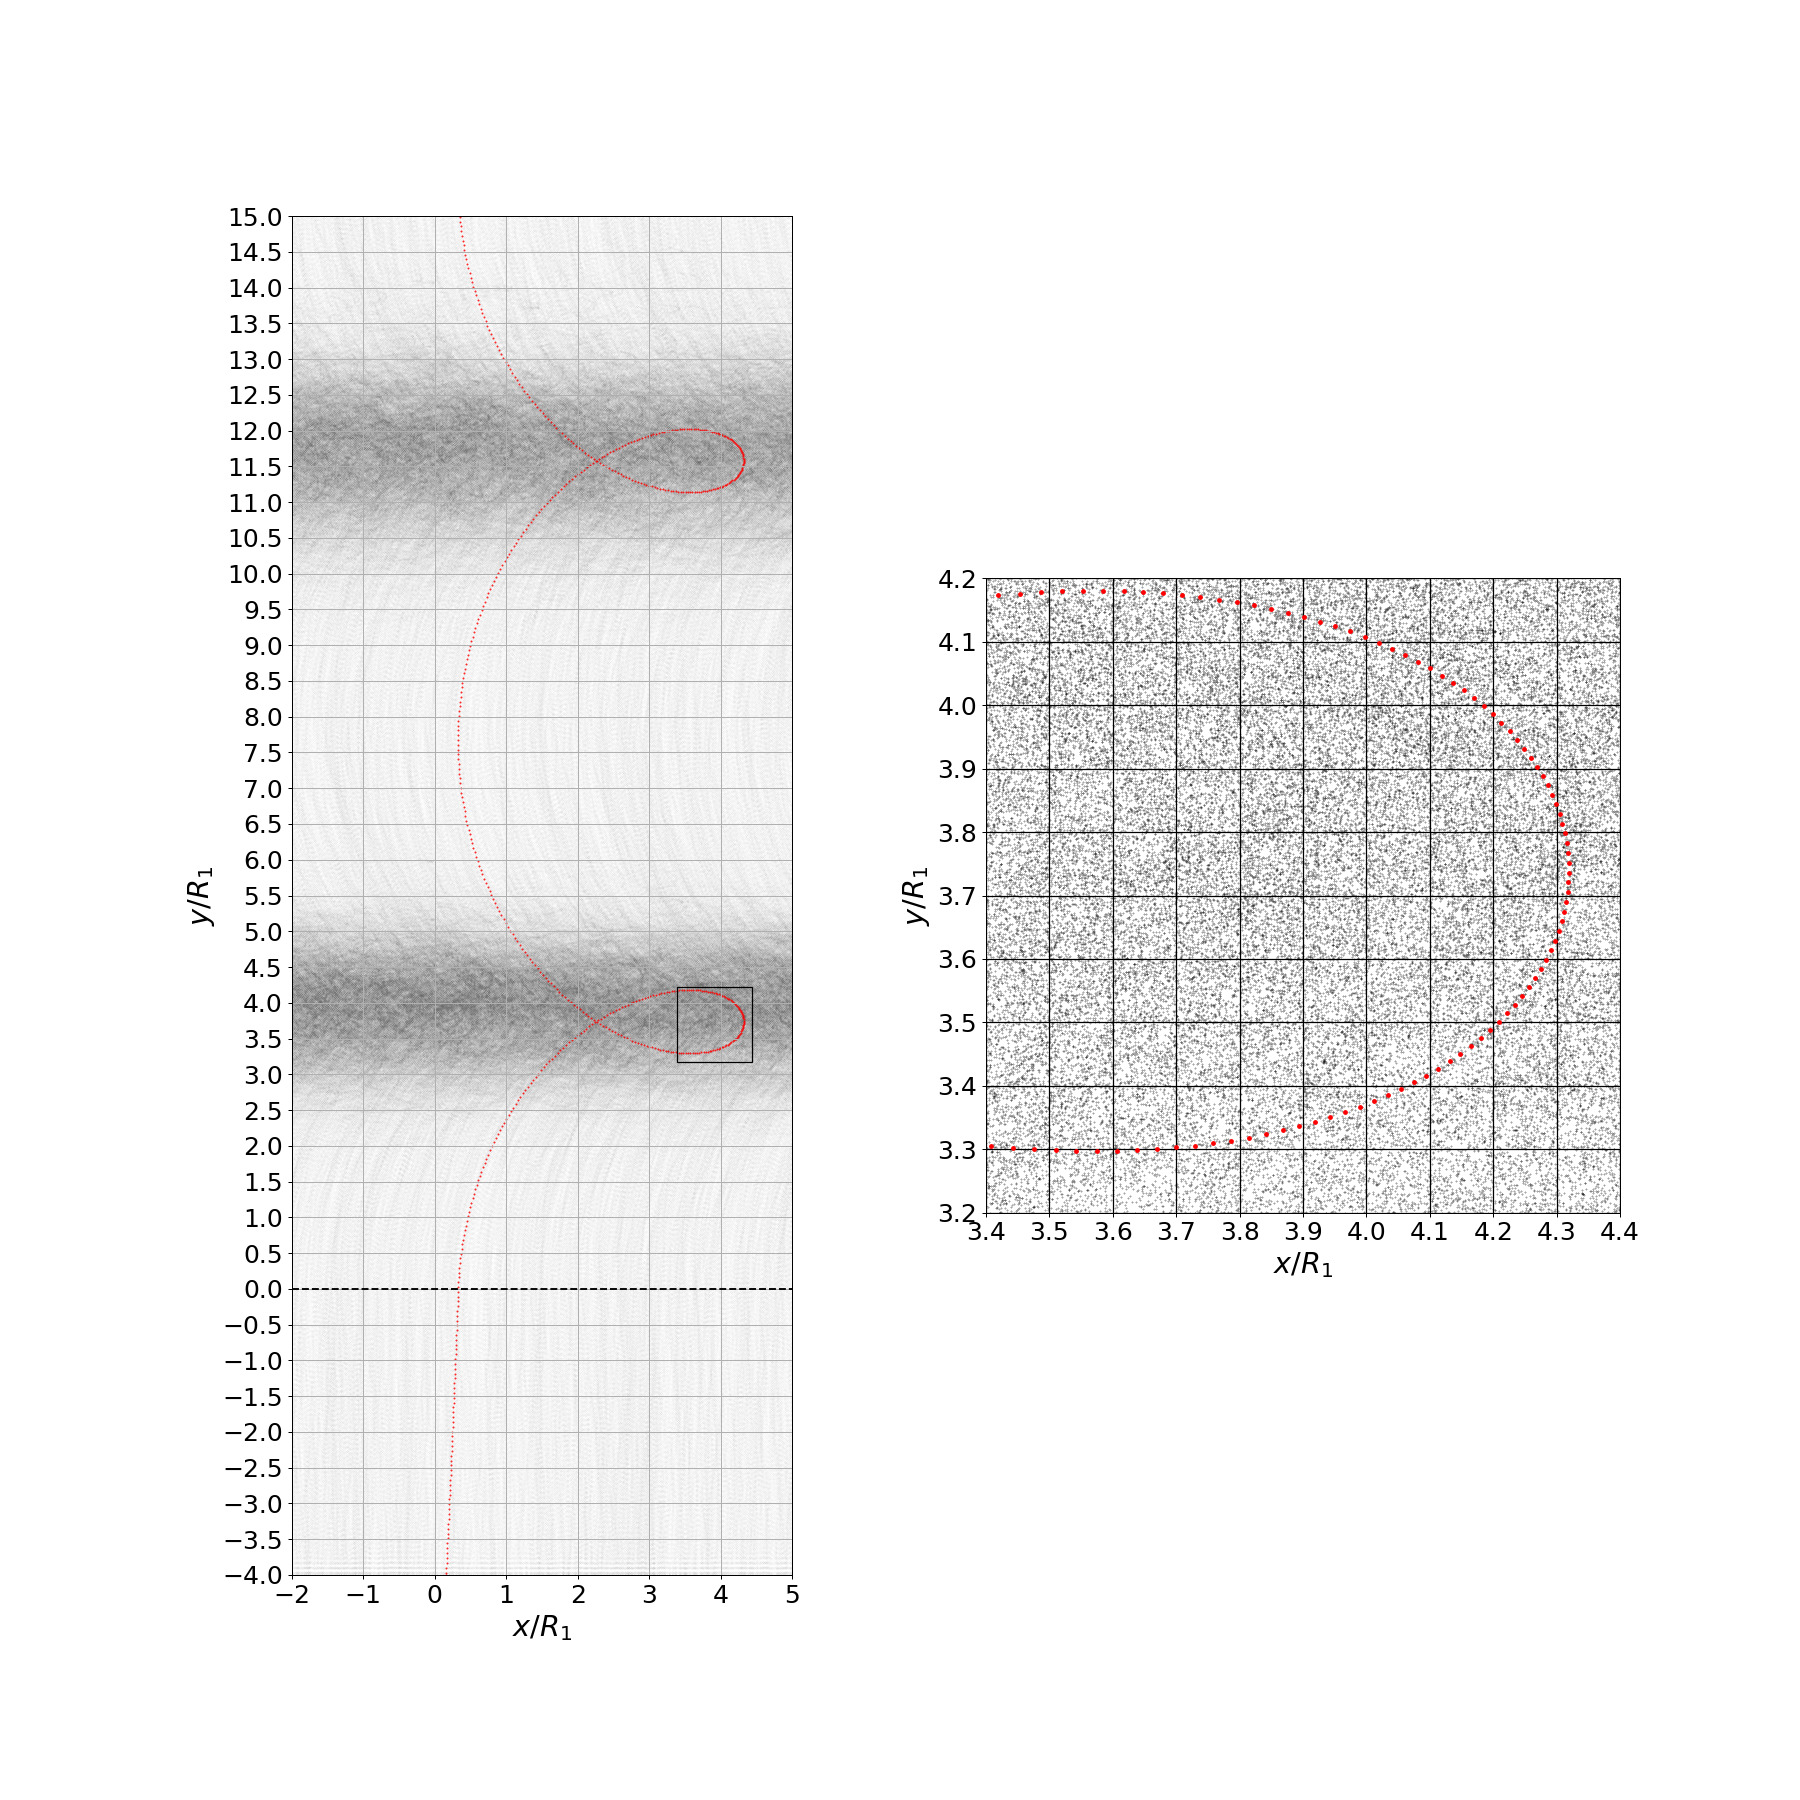

In [52]:
num = 100 

y0 = -4.0*R1 

fig,ax = plt.subplots(1,2,figsize=(20,20))

ax[0].scatter(rx[:,0:50000:10]/R1,ry[:,0:50000:10]/R1,marker='.', s=0.0002, color='k')
ax[0].scatter(rx[:,num]/R1,ry[:,num]/R1,s=1,marker='.', color='r')

ax[0].plot(3.9,3.7,'sk',markersize=60,markerfacecolor='none', markeredgecolor='black')

ax[0].axhline(y=0.0, color='k', linestyle='--')
ax[0].grid(axis='both')

for i in range(2):
    ax[i].set_xlabel(r'$x/R_1$',size=23);ax[i].set_ylabel(r'$y/R_1$',size= 23)
    ax[i].tick_params(axis='both', which='major', labelsize = 20 )
    ax[i].set_aspect(1)

ax[0].set_xlim([-2,5])
ax[0].set_ylim([-2,15])

ax[0].set_xticks(np.arange(-2, 5.1, 1))
ax[0].set_yticks(np.arange(-4, 15.1, 0.5))

ax[1].scatter(rx[:,0:50000:10]/R1,ry[:,0:50000:10]/R1, marker='o', s=0.05, color='k', zorder = 10)
ax[1].scatter(rx[:,num]/R1,ry[:,num]/R1, s = 8, marker='o', color='r', zorder = 10)

ax[1].set_xlim([3.4,4.4])
ax[1].set_ylim([3.2,4.2])

ax[1].set_xticks(np.arange(3.4, 4.5, 0.1))
ax[1].set_yticks(np.arange(3.2, 4.21, 0.1))
ax[1].grid(color = 'k', linestyle='-', linewidth=1)



plt.savefig('plot_bins.png', dpi=300, bbox_inches = 'tight')

## Figura editada no powerpoint

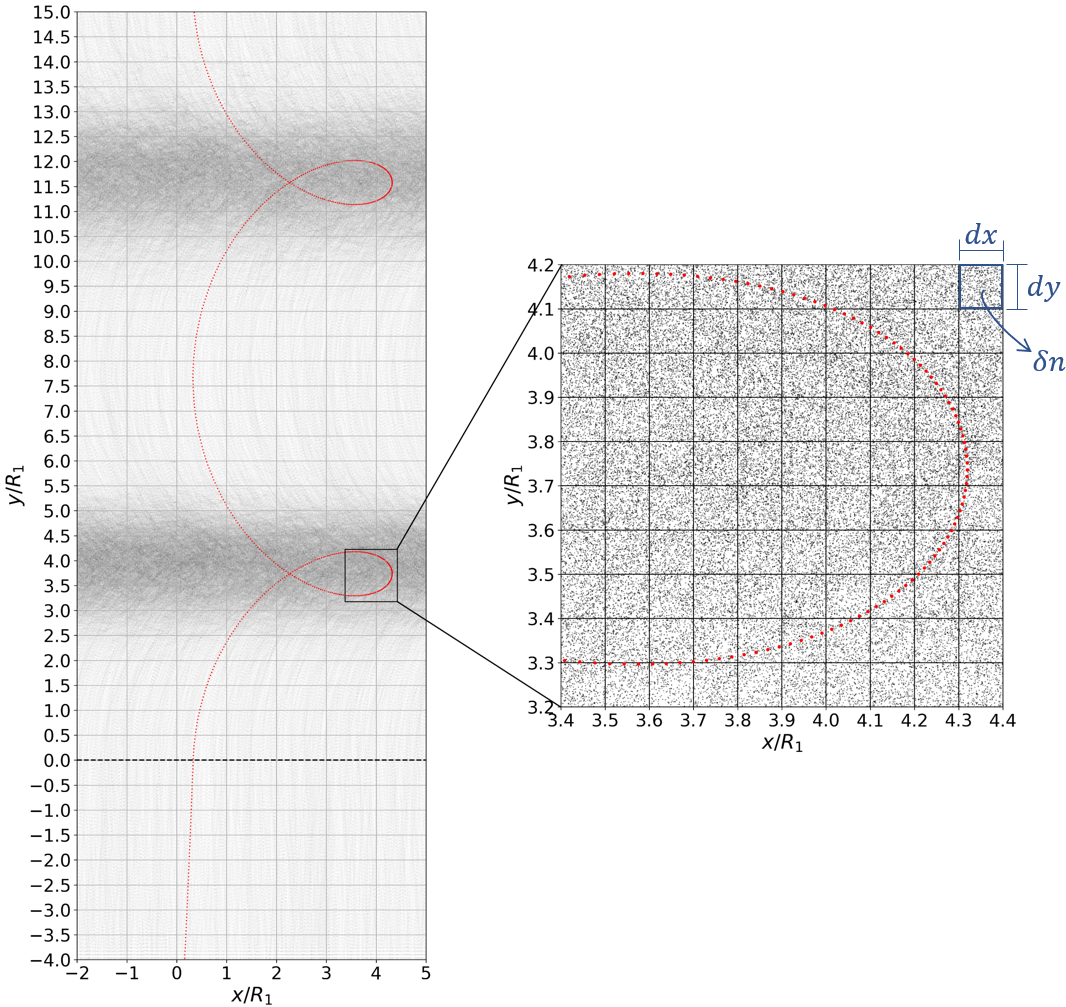